# **Lab 2.1 Image Enhancement with Math Operation**
This lab consists of two main subparts: Image Pixel Adjustment using Linear Equations and Gamma Equations.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

Read an image using OpenCV (Use your own image).

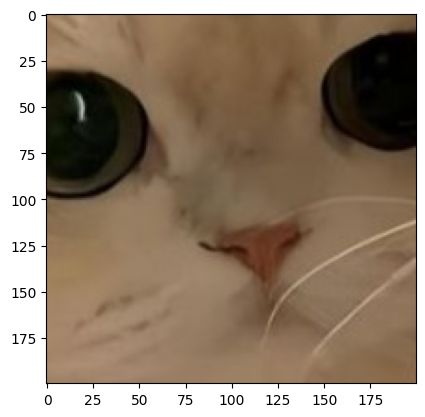

In [30]:
### START CODE HERE ###
image = 'assets/pic.jpg'
img = cv2.imread(image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)
### END CODE HERE ###

## **Image Pixel Adjustment**

### Using Linear Equation
$$I_{new} = I \cdot a + b$$

Please perform at ***least 20 iterations*** with varying values of $a$ and $b$.
Assign the result of each iteration to an array.<br/>

In [31]:
### START CODE HERE ###
a = 0
b = 0
lin_result = []
i = 0
def lin_func(x, a, b):
    return a * x + b

while i < 30:
    i += 1
    a = 0.1 * i
    b = i
    res = lin_func(img, a, b)
    res = np.clip(res, 0, 255).astype(np.uint8)
    lin_result.append(res)
### END CODE HERE ###


Plot the images in a grid as shown below. Using `ImageGrid`.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The reference output used 40 iterations.

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/1-1.png?raw=true)
</details>


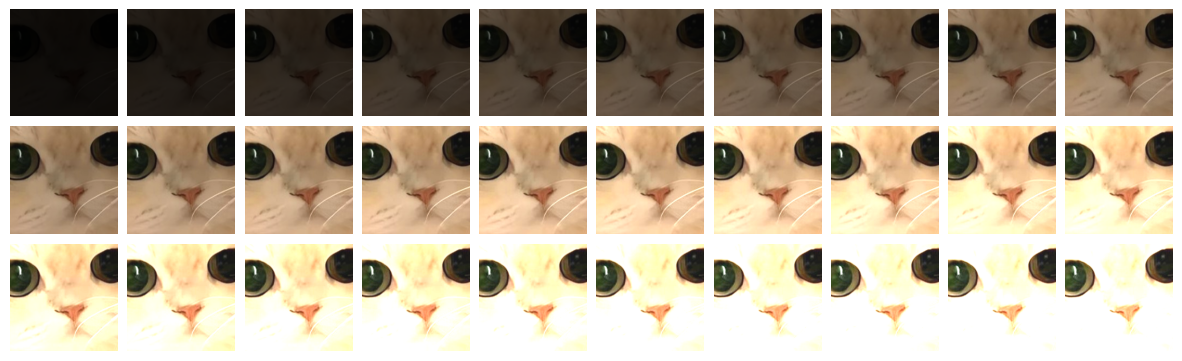

In [32]:
### START CODE HERE ###

fig = plt.figure(figsize=(15, 5))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 10), axes_pad=0.1)

for ax, img_out in zip(grid, lin_result):
	ax.imshow(img_out)
	ax.axis('off')

plt.show()
### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [33]:
assert len(lin_result) >= 20, f"Expected more than or equal 20 iterations but got {len(lin_result)}"
for idx, result in enumerate(lin_result):
    assert result.shape == img.shape, f"Shape mismatch at index {idx}. Expected {img.shape} but got {result.shape}"
    assert result.dtype == np.uint8, f"Data type mismatch at index {idx}. Expected uint8 but got {result.dtype}"
    assert np.all((result >= 0) & (result <= 255)), f"Pixel value out of bounds at index {idx}"

Save the array of images to a video. Please complete the function below.

In [34]:
### START CODE HERE ###
def write_images_to_video(image_array, output_file, frame_rate=30):
    height, width, layers = image_array[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(output_file, fourcc, frame_rate, (width, height))

    for img in image_array:
        video.write(img)

    video.release()
    print(f"Video saved as {output_file}")
### END CODE HERE ###

Use `write_images_to_video()` and save the result.

In [35]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

output_file =  os.path.join(output_folder, "output_linear.mp4")
write_images_to_video(lin_result,output_file)

Video saved as output\output_linear.mp4


Now use `matplotlib.animation` to display the animation from the images array.

In [40]:
%%capture
### START CODE HERE ###

fig, ax = plt.subplots()
ims = [[ax.imshow(img, animated=True)] for img in lin_result]
ax.axis('off')
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True)
### END CODE HERE ###

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![linear.gif](![<attachment:linear (2).gif>](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/linear.gif?raw=true))

</details>

In [41]:
display(HTML(ani.to_jshtml()))

### Gamma Equation
$$I_{new} = I^{\gamma} \cdot a + b$$

Where $a$ is 1 and $b$ is 0. 
Please perform ***at least 10 iterations*** for 0 < $\gamma$ < 1 and another ***at least 10 iterations*** for $\gamma$ > 1
Assign the result of each iteration to an array.<br/>


In [83]:
### START CODE HERE ###
a = 1
b = 0
gam_result = []

def gamma_func(x, a, b, gamma):
    # Normalize
    normalized = x / 255.0
    return ((normalized ** gamma) * a + b) * 255

# First 10 - gamma < 1
for i in range(1, 11):
    gamma = 0.1 * i  # 0.1, 0.2, ..., 1.0
    res = gamma_func(img, a, b, gamma)
    res = np.clip(res, 0, 255).astype(np.uint8)
    gam_result.append(res)

# Next 10 - gamma > 1
for i in range(1, 11):
    gamma = 1.0 + (0.2 * i)  # 1.2, 1.4, ..., 3.0
    res = gamma_func(img, a, b, gamma)
    res = np.clip(res, 0, 255).astype(np.uint8)
    gam_result.append(res)

### END CODE HERE ###

Plot the images in a grid as shown below. Using `ImageGrid`.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/1-2.png?raw=true)
</details>

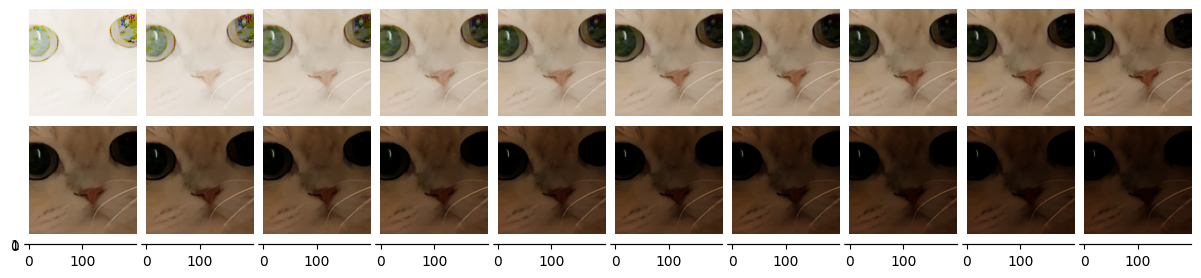

In [98]:
### START CODE HERE ###

fig = plt.figure(figsize=(15, 5))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 10), axes_pad=0.1)

for ax, img_out in zip(grid, gam_result):
	ax.imshow(img_out)
	ax.axis('off')
    
plt.show()
### END CODE HERE ###

In [99]:
assert len(gam_result) >= 20, f"more than or equal 20 iterations but got {len(gam_result)}"
for idx, result in enumerate(gam_result):
    assert result.shape == img.shape, f"Shape mismatch at index {idx}. Expected {img.shape} but got {result.shape}"
    assert result.dtype == np.uint8, f"Data type mismatch at index {idx}. Expected uint8 but got {result.dtype}"
    assert np.all((result >= 0) & (result <= 255)), f"Pixel value out of bounds at index {idx}"

Use `write_images_to_video()` and save the result.

In [100]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

output_file =  os.path.join(output_folder, "output_gamma.mp4")
write_images_to_video(gam_result,output_file)

Video saved as output\output_gamma.mp4


Now use `matplotlib.animation` to display the animation from the images array.

In [101]:
%%capture
### START CODE HERE ###

fig, ax = plt.subplots()
ims = [[ax.imshow(img, animated=True)] for img in gam_result]
ax.axis('off')
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True)
### END CODE HERE ###

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![gamma2.gif](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/gamma.gif?raw=true)

</details>

In [102]:
display(HTML(ani.to_jshtml()))

---

## **Questions**
1. If an image having over brightness or saturation, what would be possible solutions to enhance the image.
2. How can we make an image reverse intensity (black-to-white, white-to-black)? Explain the process